# **Import Library dan Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/Automobile.csv")

# **Menampilkan 5 data pertama**

In [4]:
print ("5 data pertama :")
df.head()

5 data pertama :


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


# **Menampilkan 5 data terakhir**

In [5]:
print ("5 data terakhir :")
df.tail()

5 data terakhir :


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1
204,22625.0,25,19,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1


# **Data Understanding**

In [6]:
print ("Data shape (baris,kolom) :")
print(df.shape)

print('\n')
df.info()

print ('\nJumlah data duplikat : ' )
df.duplicated().sum()



Data shape (baris,kolom) :
(205, 26)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    

0

In [7]:
df.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses',
       'symboling'],
      dtype='object')

In [8]:
df.dtypes

,0
price,float64
highway-mpg,int64
city-mpg,int64
peak-rpm,float64
horsepower,float64
compression-ratio,float64
stroke,float64
bore,float64
fuel-system,object
engine-size,int64


In [9]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


# **Data Preparation**

# **Handle Missing Value dan Data Duplikat (tetapi tidak ada data duplikat dilihat dari data understanding diatas)**

In [10]:
df = df.drop_duplicates()
print(f"Jumlah baris sebelum dilakukan dropna: {df.shape[0]}")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
print(f"Jumlah baris setelah dilakukan dropna: {df.shape[0]}")
print("\nJumlah Dataset Duplikat:")
df.duplicated().sum()

Jumlah baris sebelum dilakukan dropna: 205
Jumlah baris setelah dilakukan dropna: 159

Jumlah Dataset Duplikat:


0

In [11]:
df.isna().sum()

,0
price,0
highway-mpg,0
city-mpg,0
peak-rpm,0
horsepower,0
compression-ratio,0
stroke,0
bore,0
fuel-system,0
engine-size,0


# **Outliers**


ANALISIS OUTLIER: price
Q1: 7372.00
Q3: 14719.50
IQR: 7347.50
Lower Bound: -3649.25
Upper Bound: 25740.75
Jumlah outliers pada kolom price: 5 (3.14% dari total data)

Outlier ditangani dengan capping (winsorizing)


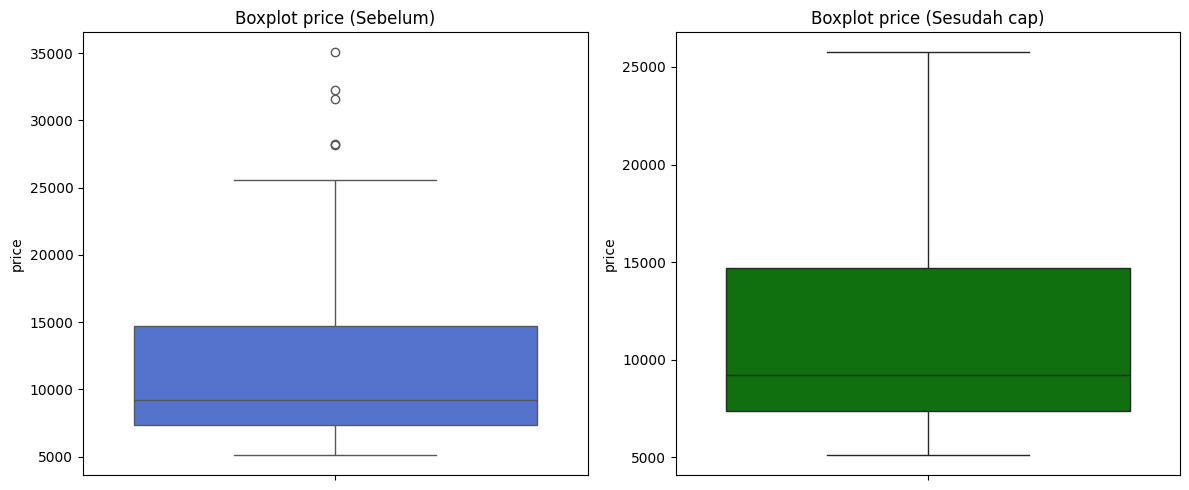


ANALISIS OUTLIER: highway-mpg
Q1: 28.00
Q3: 37.00
IQR: 9.00
Lower Bound: 14.50
Upper Bound: 50.50
Jumlah outliers pada kolom highway-mpg: 2 (1.26% dari total data)


<ipython-input-12-9fd77620c0b5>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound



Outlier ditangani dengan capping (winsorizing)


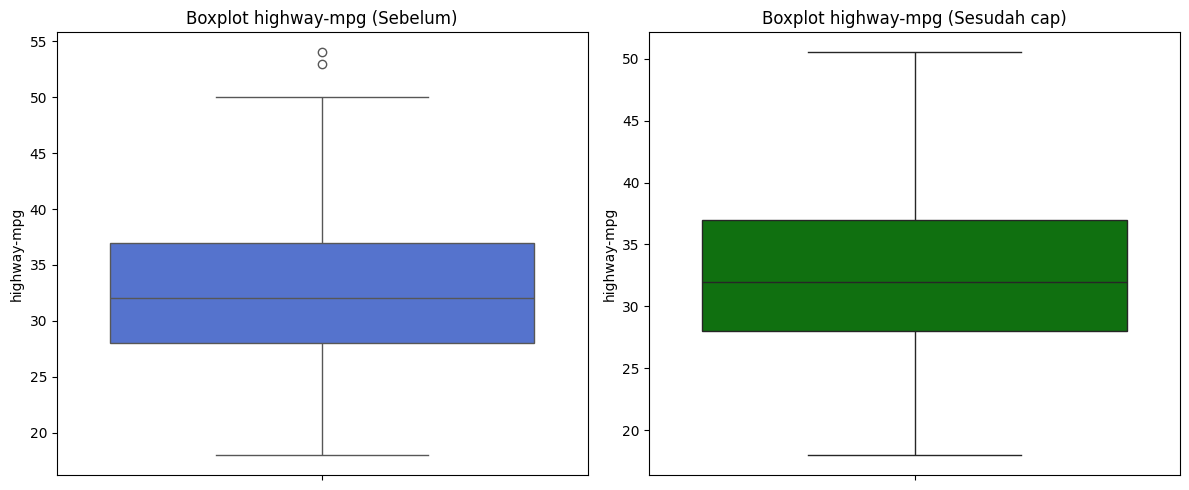


ANALISIS OUTLIER: city-mpg
Q1: 23.00
Q3: 31.00
IQR: 8.00
Lower Bound: 11.00
Upper Bound: 43.00
Jumlah outliers pada kolom city-mpg: 3 (1.89% dari total data)

Outlier ditangani dengan capping (winsorizing)


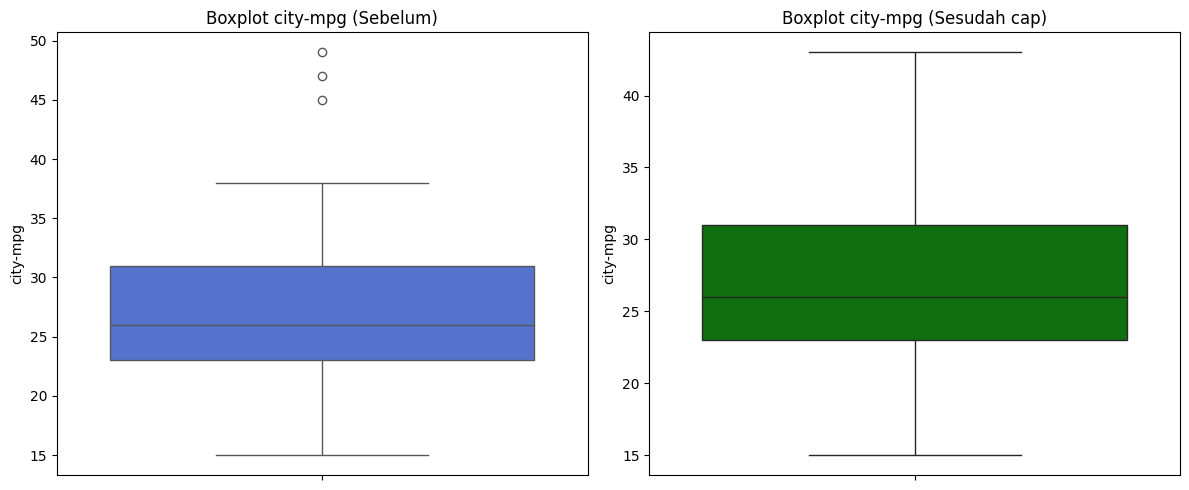


ANALISIS OUTLIER: peak-rpm
Q1: 4800.00
Q3: 5500.00
IQR: 700.00
Lower Bound: 3750.00
Upper Bound: 6550.00
Jumlah outliers pada kolom peak-rpm: 2 (1.26% dari total data)

Outlier ditangani dengan capping (winsorizing)


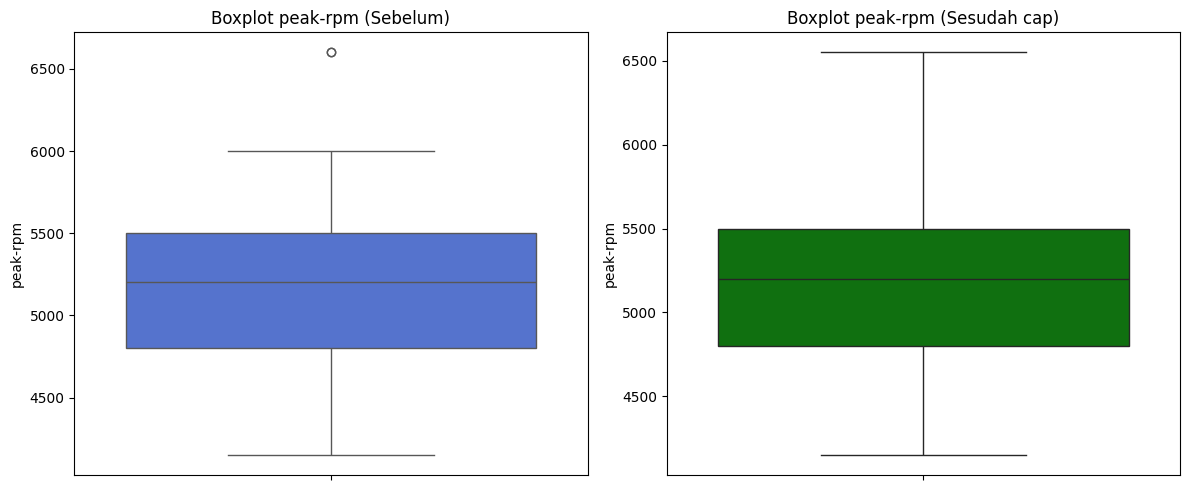


ANALISIS OUTLIER: horsepower
Q1: 69.00
Q3: 114.00
IQR: 45.00
Lower Bound: 1.50
Upper Bound: 181.50
Jumlah outliers pada kolom horsepower: 1 (0.63% dari total data)

Outlier ditangani dengan capping (winsorizing)


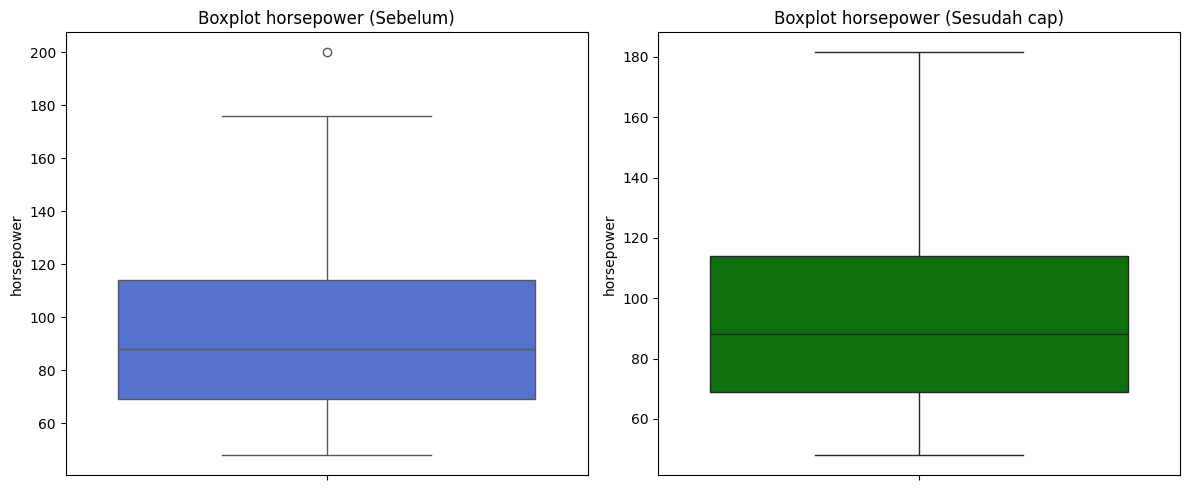


ANALISIS OUTLIER: compression-ratio
Q1: 8.70
Q3: 9.40
IQR: 0.70
Lower Bound: 7.65
Upper Bound: 10.45
Jumlah outliers pada kolom compression-ratio: 25 (15.72% dari total data)

Outlier ditangani dengan capping (winsorizing)


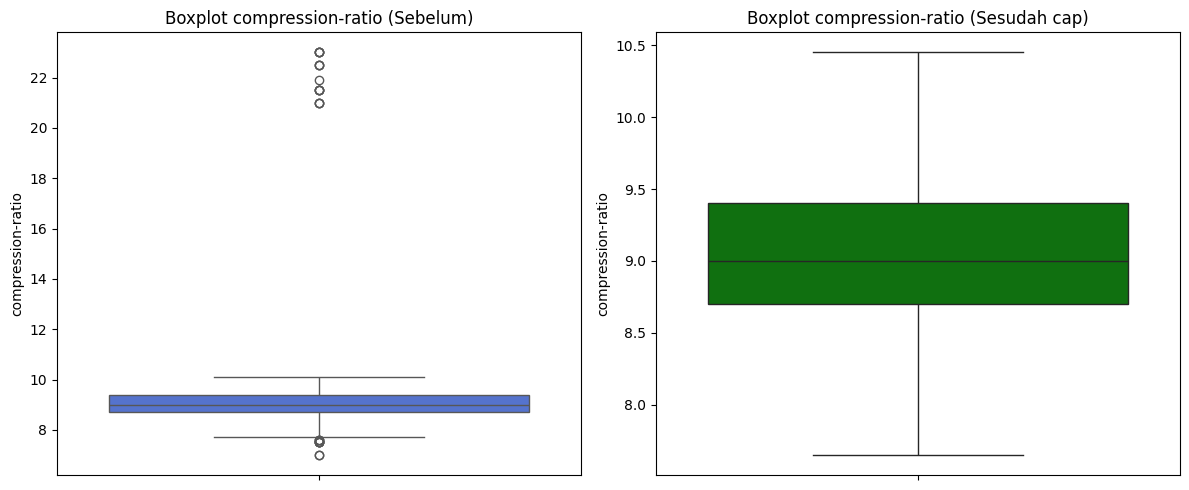


ANALISIS OUTLIER: stroke
Q1: 3.10
Q3: 3.41
IQR: 0.31
Lower Bound: 2.65
Upper Bound: 3.87
Jumlah outliers pada kolom stroke: 16 (10.06% dari total data)

Outlier ditangani dengan capping (winsorizing)


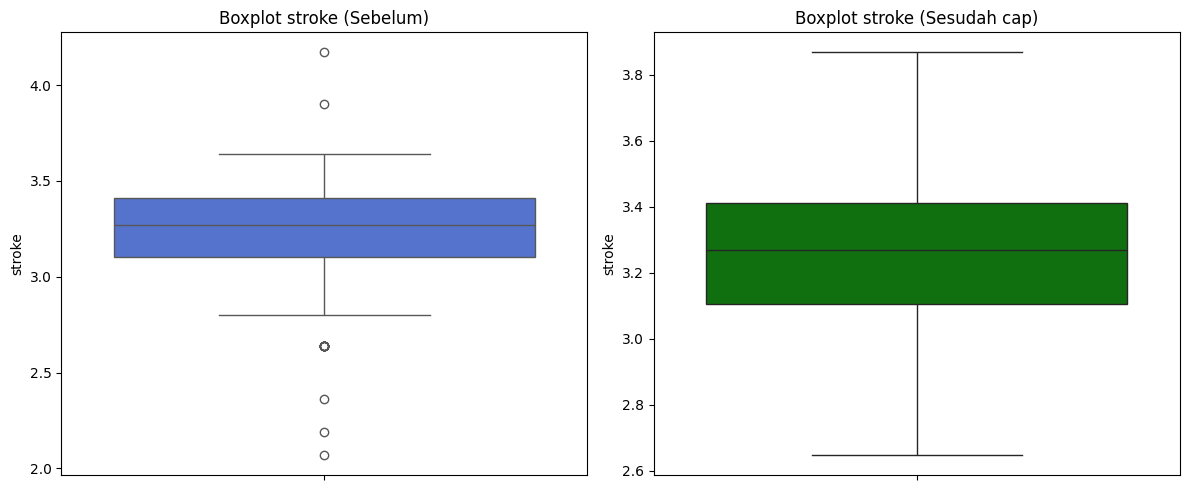


ANALISIS OUTLIER: bore
Q1: 3.05
Q3: 3.56
IQR: 0.51
Lower Bound: 2.28
Upper Bound: 4.33
Jumlah outliers pada kolom bore: 0 (0.00% dari total data)


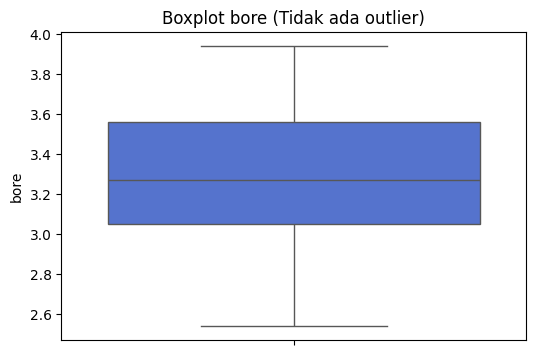


ANALISIS OUTLIER: engine-size
Q1: 97.00
Q3: 135.00
IQR: 38.00
Lower Bound: 40.00
Upper Bound: 192.00
Jumlah outliers pada kolom engine-size: 2 (1.26% dari total data)

Outlier ditangani dengan capping (winsorizing)


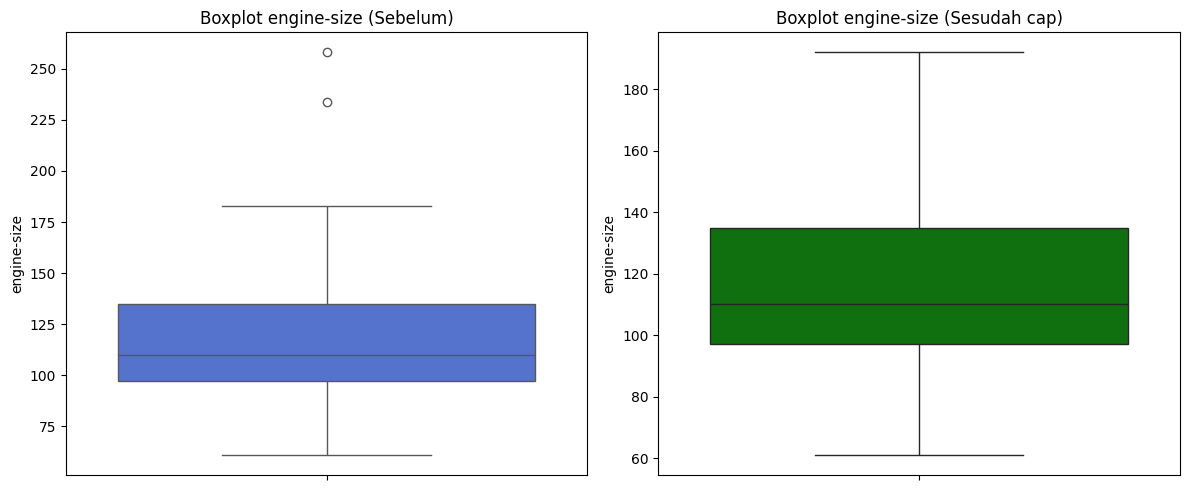


ANALISIS OUTLIER: num-of-cylinders
Q1: 4.00
Q3: 4.00
IQR: 0.00
Lower Bound: 4.00
Upper Bound: 4.00
Jumlah outliers pada kolom num-of-cylinders: 23 (14.47% dari total data)

Outlier ditangani dengan capping (winsorizing)


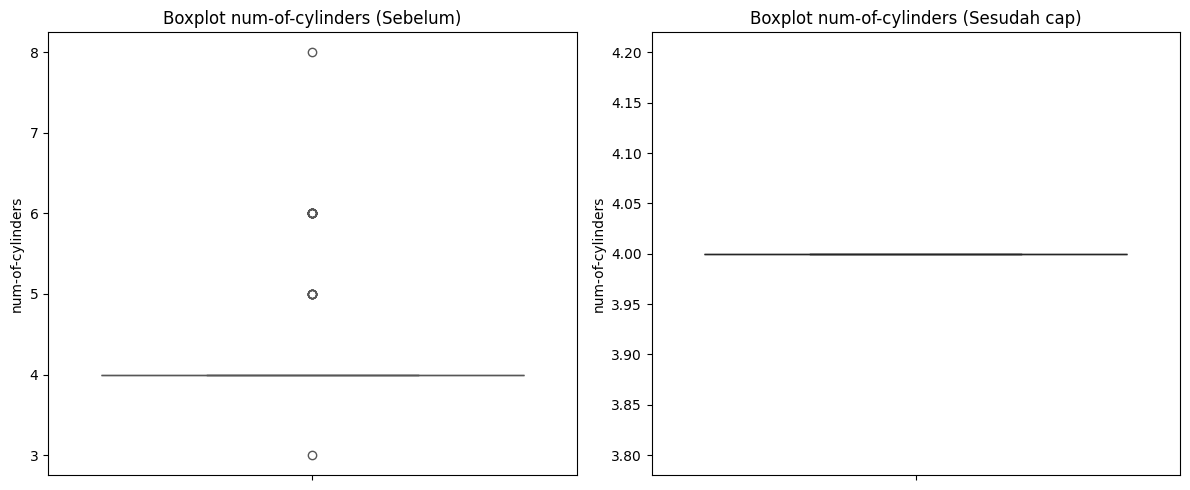


ANALISIS OUTLIER: curb-weight
Q1: 2065.50
Q3: 2809.50
IQR: 744.00
Lower Bound: 949.50
Upper Bound: 3925.50
Jumlah outliers pada kolom curb-weight: 1 (0.63% dari total data)

Outlier ditangani dengan capping (winsorizing)


<ipython-input-12-9fd77620c0b5>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '949.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound


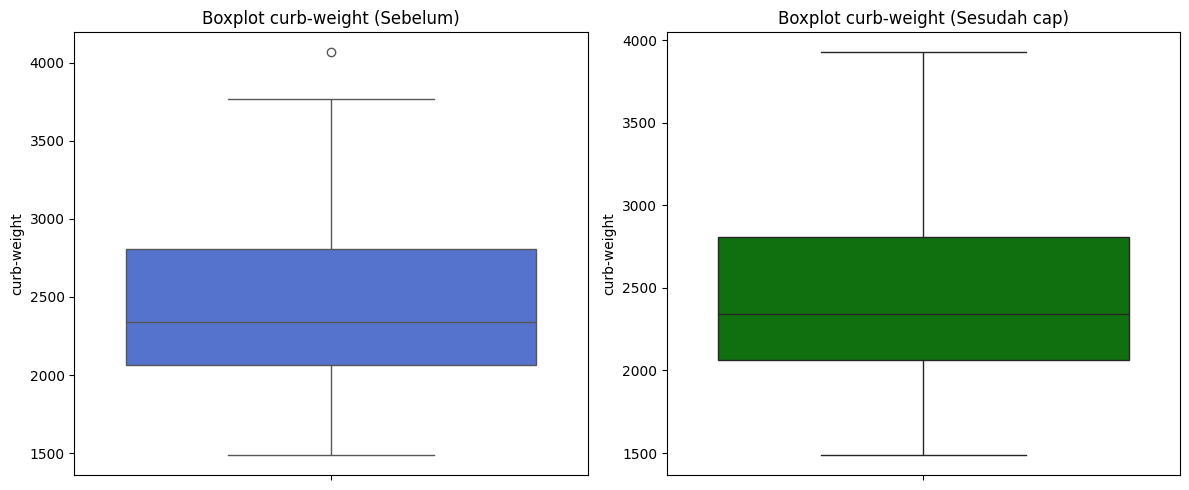


ANALISIS OUTLIER: height
Q1: 52.25
Q3: 55.50
IQR: 3.25
Lower Bound: 47.38
Upper Bound: 60.38
Jumlah outliers pada kolom height: 0 (0.00% dari total data)


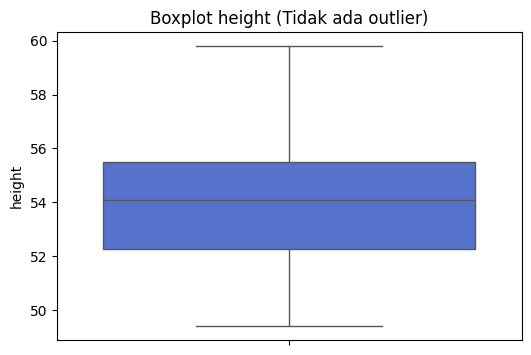


ANALISIS OUTLIER: width
Q1: 64.00
Q3: 66.50
IQR: 2.50
Lower Bound: 60.25
Upper Bound: 70.25
Jumlah outliers pada kolom width: 7 (4.40% dari total data)

Outlier ditangani dengan capping (winsorizing)


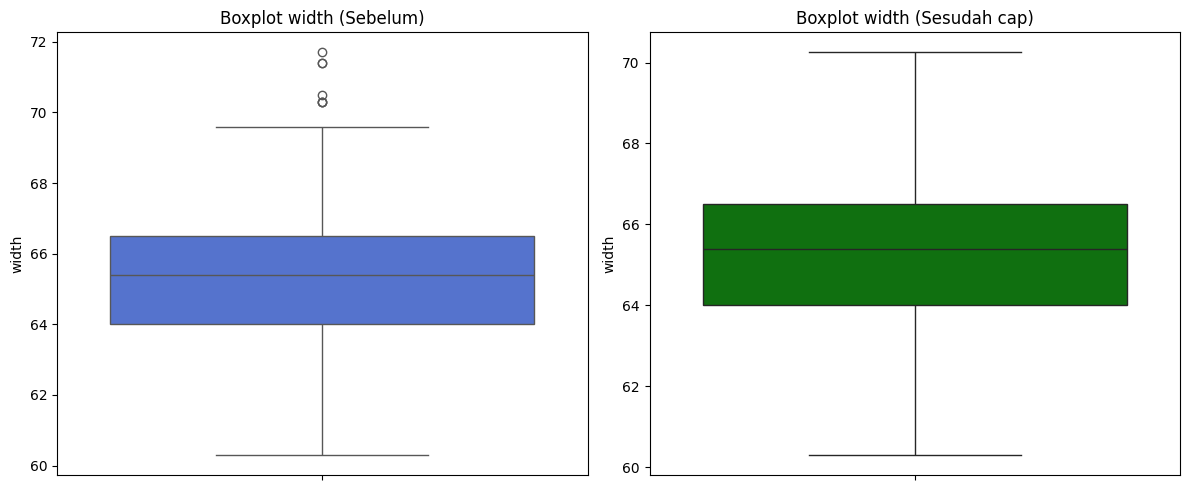


ANALISIS OUTLIER: length
Q1: 165.65
Q3: 177.80
IQR: 12.15
Lower Bound: 147.42
Upper Bound: 196.03
Jumlah outliers pada kolom length: 5 (3.14% dari total data)

Outlier ditangani dengan capping (winsorizing)


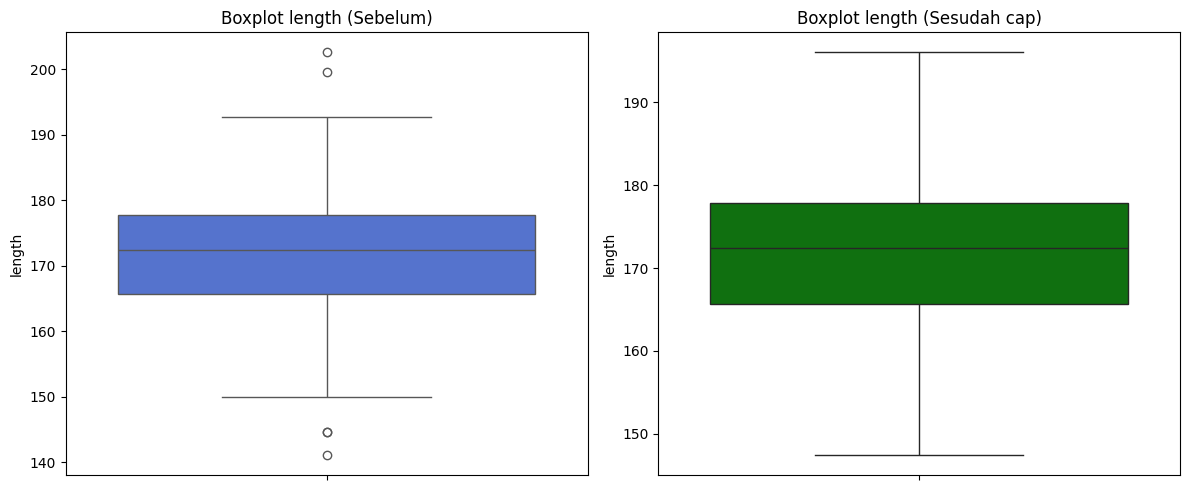


ANALISIS OUTLIER: wheel-base
Q1: 94.50
Q3: 100.80
IQR: 6.30
Lower Bound: 85.05
Upper Bound: 110.25
Jumlah outliers pada kolom wheel-base: 2 (1.26% dari total data)

Outlier ditangani dengan capping (winsorizing)


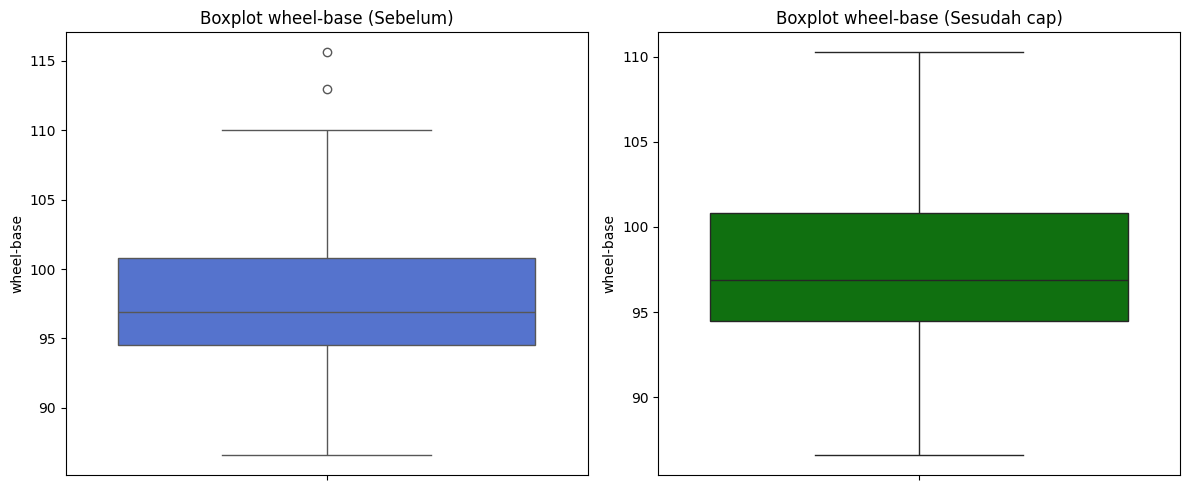


ANALISIS OUTLIER: num-of-doors
Q1: 2.00
Q3: 4.00
IQR: 2.00
Lower Bound: -1.00
Upper Bound: 7.00
Jumlah outliers pada kolom num-of-doors: 0 (0.00% dari total data)


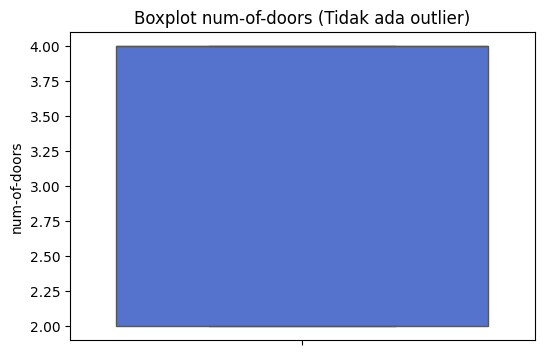


ANALISIS OUTLIER: normalized-losses
Q1: 94.00
Q3: 148.00
IQR: 54.00
Lower Bound: 13.00
Upper Bound: 229.00
Jumlah outliers pada kolom normalized-losses: 2 (1.26% dari total data)

Outlier ditangani dengan capping (winsorizing)


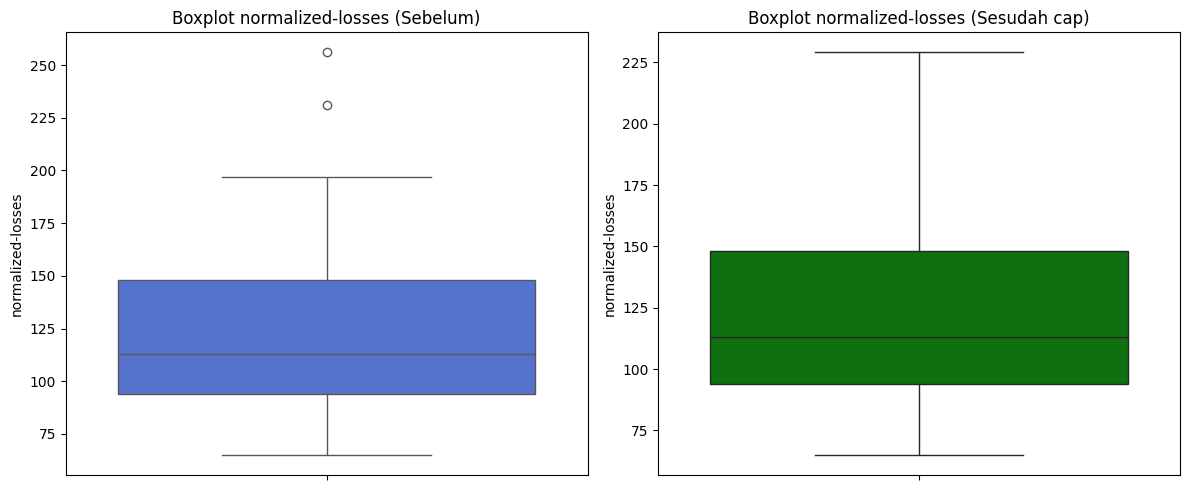


ANALISIS OUTLIER: symboling
Q1: 0.00
Q3: 2.00
IQR: 2.00
Lower Bound: -3.00
Upper Bound: 5.00
Jumlah outliers pada kolom symboling: 0 (0.00% dari total data)


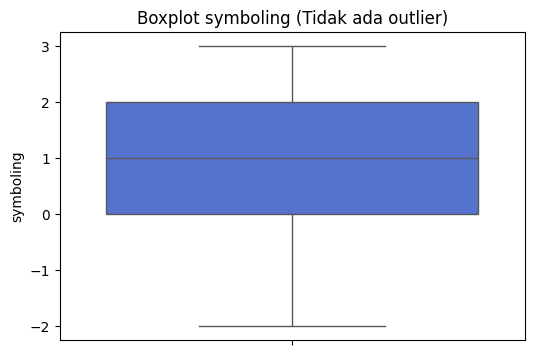

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_handle_outliers(df, handle_method='cap', multiplier=1.5):
    """
    Fungsi untuk mendeteksi outlier dan menampilkan boxplot sebelum dan sesudah penanganan

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame yang akan dianalisis
    handle_method : str, default='cap'
        Metode penanganan outlier ('cap', 'remove', 'mean', atau 'median')
    multiplier : float, default=1.5
        Faktor pengali IQR untuk menentukan batas outlier

    Returns:
    --------
    df_cleaned : pandas DataFrame
        DataFrame setelah penanganan outlier
    """
    # Buat salinan dataframe untuk dimodifikasi
    df_cleaned = df.copy()

    # Dapatkan kolom numerik
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Loop untuk setiap kolom numerik
    for col in numerical_columns:
        # Hitung statistik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Identifikasi outlier
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        num_outliers = outlier_mask.sum()
        outlier_percentage = (num_outliers / df.shape[0]) * 100

        # Tampilkan informasi statistik dan jumlah outlier
        print(f"\n{'='*50}")
        print(f"ANALISIS OUTLIER: {col}")
        print(f"{'='*50}")
        print(f"Q1: {Q1:.2f}")
        print(f"Q3: {Q3:.2f}")
        print(f"IQR: {IQR:.2f}")
        print(f"Lower Bound: {lower_bound:.2f}")
        print(f"Upper Bound: {upper_bound:.2f}")
        print(f"Jumlah outliers pada kolom {col}: {num_outliers} ({outlier_percentage:.2f}% dari total data)")

        # Terapkan penanganan outlier jika ada
        if num_outliers > 0:
            # Buat boxplot sebelum dan sesudah penanganan
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # Boxplot data asli
            sns.boxplot(y=df[col], ax=ax1, color="royalblue")
            ax1.set_title(f"Boxplot {col} (Sebelum)")
            ax1.set_ylabel(col)

            # Penanganan outlier berdasarkan metode yang dipilih
            if handle_method == 'cap':
                df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound
                df_cleaned.loc[df_cleaned[col] > upper_bound, col] = upper_bound
                print(f"\nOutlier ditangani dengan capping (winsorizing)")
            elif handle_method == 'remove':
                df_cleaned = df_cleaned[~outlier_mask]
                print(f"\nOutlier ditangani dengan menghapus {num_outliers} baris data")
            elif handle_method == 'mean':
                mean_val = df[col].mean()
                df_cleaned.loc[outlier_mask, col] = mean_val
                print(f"\nOutlier ditangani dengan mengganti nilai outlier dengan mean: {mean_val:.2f}")
            elif handle_method == 'median':
                median_val = df[col].median()
                df_cleaned.loc[outlier_mask, col] = median_val
                print(f"\nOutlier ditangani dengan mengganti nilai outlier dengan median: {median_val:.2f}")

            # Boxplot data yang sudah ditangani
            sns.boxplot(y=df_cleaned[col], ax=ax2, color="green")
            ax2.set_title(f"Boxplot {col} (Sesudah {handle_method})")
            ax2.set_ylabel(col)

            plt.tight_layout()
            plt.show()
        else:
            # Jika tidak ada outlier, tampilkan hanya satu boxplot
            plt.figure(figsize=(6, 4))
            sns.boxplot(y=df[col], color="royalblue")
            plt.title(f"Boxplot {col} (Tidak ada outlier)")
            plt.ylabel(col)
            plt.show()

    return df_cleaned

# Contoh penggunaan:
df_clean = detect_and_handle_outliers(df, handle_method='cap')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              159 non-null    float64
 1   highway-mpg        159 non-null    int64  
 2   city-mpg           159 non-null    int64  
 3   peak-rpm           159 non-null    float64
 4   horsepower         159 non-null    float64
 5   compression-ratio  159 non-null    float64
 6   stroke             159 non-null    float64
 7   bore               159 non-null    float64
 8   fuel-system        159 non-null    object 
 9   engine-size        159 non-null    int64  
 10  num-of-cylinders   159 non-null    int64  
 11  engine-type        159 non-null    object 
 12  curb-weight        159 non-null    int64  
 13  height             159 non-null    float64
 14  width              159 non-null    float64
 15  length             159 non-null    float64
 16  wheel-base         159 non-null

# **Target and Features**

In [14]:
X = df.select_dtypes(include=[np.number]).drop(columns=["symboling"])
y = df["symboling"].astype(int)

# **Split Data (train and test)**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Train Model**

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Prediction**

In [17]:
y_pred = model.predict(X_test)

# **Evaluation Metrics**

In [18]:
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MSE: 0.63
RMSE: 0.80
R-squared: 0.58


# **Metrik Evaluasi dalam Regresi Linear**

### **Mean Squared Error (MSE)**
MSE adalah rata-rata kuadrat dari selisih antara nilai aktual (\( y_i \)) dan nilai prediksi (\( \hat{y}_i \)):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### **Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE, yang memiliki satuan yang sama dengan data asli:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

---

### **R-squared (R²)**
R² mengukur seberapa baik model menjelaskan variasi dalam data:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Dengan:

$$
SS_{res} = \sum (y_i - \hat{y}_i)^2
$$

$$
SS_{tot} = \sum (y_i - \bar{y})^2
$$

- \( SS_{res} \) = jumlah kuadrat residual (error)  
- \( SS_{tot} \) = jumlah kuadrat total  

**Interpretasi:**
- Jika **\( R^2 \approx 1 \)** → Model sangat baik  
- Jika **\( R^2 \approx 0 \)** → Model kurang baik  

---



# **Visualization**

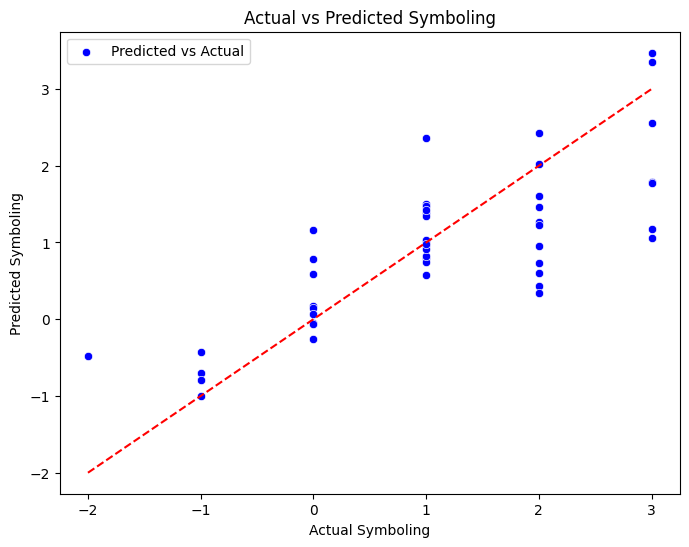

In [20]:

# Scatter plot antara nilai aktual dan prediksi
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")

# Tambahkan garis referensi y=x (sebagai perbandingan ideal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")

# Label sumbu
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.show()


In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
# Function to perform grid search and return best model & metrics
def perform_grid_search(model, param_grid, model_name):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Regression")
    print(f"Best Model Parameters: {grid_search.best_params_}")
    print(f"Best Model MSE: {mse:.4f}")
    print(f"Best Model RMSE: {rmse:.4f}")
    print(f"Best Model R²: {r2:.4f}\n")

    return best_model, mse, rmse, r2

# Run Grid Search for Ridge Regression
ridge = Ridge()
param_grid_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
best_ridge_model = perform_grid_search(ridge, param_grid_ridge, "Ridge")

# Run Grid Search for Lasso Regression
lasso = Lasso()
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
best_lasso_model = perform_grid_search(lasso, param_grid_lasso, "Lasso")

# Run Grid Search for Elastic Net Regression
elastic_net = ElasticNet()
param_grid_elastic = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
best_elastic_model = perform_grid_search(elastic_net, param_grid_elastic, "Elastic Net")


Ridge Regression
Best Model Parameters: {'alpha': 10}
Best Model MSE: 0.6368
Best Model RMSE: 0.7980
Best Model R²: 0.5782

Lasso Regression
Best Model Parameters: {'alpha': 0.0001}
Best Model MSE: 0.6345
Best Model RMSE: 0.7966
Best Model R²: 0.5798

Elastic Net Regression
Best Model Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best Model MSE: 0.6335
Best Model RMSE: 0.7959
Best Model R²: 0.5805

